Assuma um modelo predador-presa de duas espécies, onde a espécie de presa ($ V $) é reabastecida por imigração, e não por reprodução, e a espécie predadora ($ P $) tem sua taxa de natalidade determinada exclusivamente por sua taxa de ingestão de presas. Sendo assim, as equações do modelo podem ser representadas pelo sistema de primeira ordem:

Variação da vítima (vítima $ V $): $ \frac{\partial V}{\partial t} = \theta - a PV $  
Variação do predador (predador $ P $): $ \frac{\partial P}{\partial t} = \epsilon a PV - sP $,  
onde:  
* $ \theta = $ taxa de imigração das presas,  
* $ a = $ eficiência de captura, ou seja, o efeito de um predador sobre o crescimento populacional das presas,  
* $ \epsilon = $ eficiência de conversão de presas consumidas em novos predadores,  
* $ s = $ taxa de mortalidade per capita dos predadores.

Observe que o termo $ \epsilon a V $ é a taxa de crescimento per capita da população de predadores em função da abundância das presas.

Considere:
* $ \theta = 10 $,  
* $ \epsilon = 1 $,
* $ a = 0.1 $.  
E dois valores para a taxa de mortalidade per capita dos predadores:
* $ s = 0.3 $,  
* $ s = 2 $.

Para caso caso, resolva para um período de 40 gerações, no intervalo de tempo $ [0, 40] $, usando o comando `lsode`, e assumindo população inicial de 1 presa e 1 predador ($ V(0) = 1 $ e $ P(0) = 1 $). Para cada taxa de mortalidade dos predadores, mostre em um mesmo gráfico o tamanho das populações e faça uma análise suscinta dos resultados obtidos, observando o comportamento das populações em torno dos pontos de equilı́brio com relação ao tempo.


In [8]:
graphics_toolkit ("gnuplot");

Iniciando variáveis pré-definidas

In [2]:
global theta;
theta = 10;
global epsilon;
epsilon = 1;
global a;
a = 0.1;
P_0 = 1;
V_0 = 1;

In [3]:
t = linspace(0,40, 40);

Botando as funções em forma vetorial:, usando `X(1)` como $ P $ e `X(2)` como $ V $:

In [4]:
function y = f03(X)
    global theta;
    global epsilon;
    global a;
    y(1) = theta - a * X(1) * X(2);
    y(2) = epsilon * a * X(2) * X(1) - 0.3 * X(1);
endfunction

function y = f2(X)
    global theta;
    global epsilon;
    global a;
    y(1) = theta - a * X(1) * X(2);
    y(2) = epsilon * a * X(2) * X(1) - 2 * X(1);
endfunction

In [5]:
% lsode_options ("relative tolerance", 0.85); % não consigo executar sem essa linha, dá erro, e 0.85 é o menor valor que consigo colocar de tolerância relativa. Isso pode indicar que o sistema é mal condicionado.

lsode("f03", [P_0; V_0], t);
lsode("f2", [P_0; V_0], t);











































      In above message,  I1 =        10
 LSODE--  AT T (=R1) AND STEP SIZE H (=R2), THE    
       CORRECTOR CONVERGENCE FAILED REPEATEDLY     
       OR WITH ABS(H) = HMIN   
      In above,  R1 =  0.2344352754652D+01   R2 =  0.5061595981106-153
error: lsode: repeated convergence failures (t = 2.34435; perhaps bad Jacobian supplied or wrong choice of integration method or tolerances)










































      In above message,  I1 =        10
 LSODE--  AT T (=R1) AND STEP SIZE H (=R2), THE    
       CORRECTOR CONVERGENCE FAILED REPEATEDLY     
       OR WITH ABS(H) = HMIN   
      In above,  R1 =  0.1467343407672D+01   R2 =  0.5287894255911-153
error: lsode: repeated convergence failures (t = 1.46734; perhaps bad Jacobian supplied or wrong choice of integration method or tolerances)


In [6]:
lsode_options ("relative tolerance", 0.85);

[s03, istate, msg] = lsode("f03", [P_0; V_0], t);
[s2, istate, msg] = lsode("f2", [P_0; V_0], t);

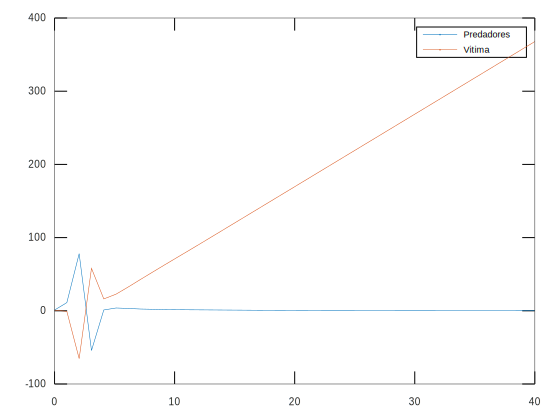

In [9]:
%plot --format svg
plot(t, s03(:,1), t, s03(:,2))
hold on
legend("Predadores", "Vitima");

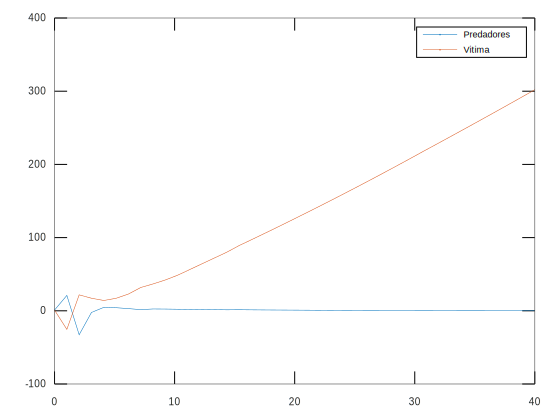

In [10]:
plot(t, s2(:,1), t, s2(:,2))
hold on
legend("Predadores", "Vitima");